### Find the accuracy of using a Logistic Regression on the loan data

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


### Load the training and testing set

In [2]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

### Use SMOTE to balance the dataset

In [3]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Build the Logistics regression model

In [4]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

### Test the model

In [5]:
y_pred = model.predict(X_test)

### Evaluate the model

              precision    recall  f1-score   support

           0      0.881     0.920     0.900       323
           1      0.950     0.925     0.937       531

    accuracy                          0.923       854
   macro avg      0.916     0.922     0.919       854
weighted avg      0.924     0.923     0.923       854



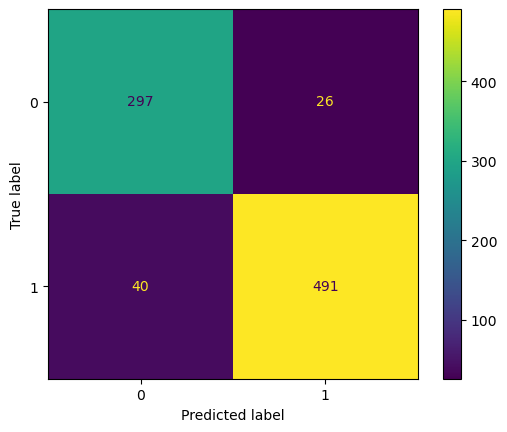

In [6]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, y_pred, digits=3))

In [7]:
print("Model accuracy:", model.score(X_test, y_test))

Model accuracy: 0.9227166276346604
